In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_71013_I')

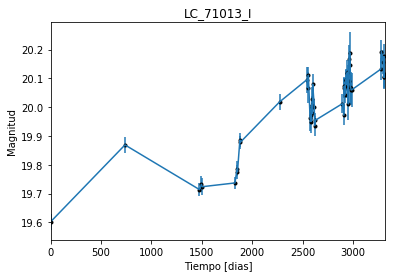

In [2]:
data = np.genfromtxt('LC_71013_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71013_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

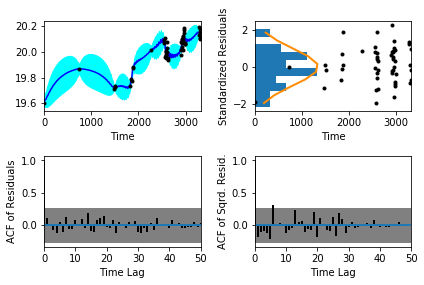

In [5]:
sample.assess_fit()

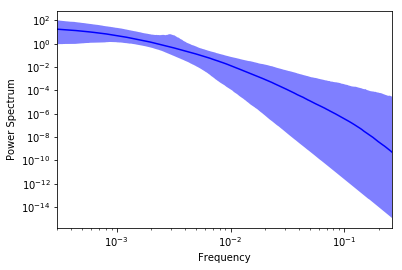

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_71013_I')

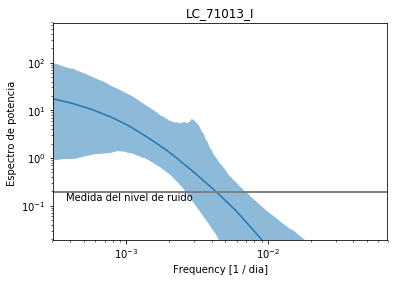

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71013_I')

Text(0.5,1,'Prediccion , valor esperado 71013_I')

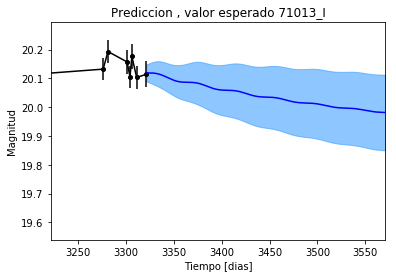

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 71013_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_71013_I')

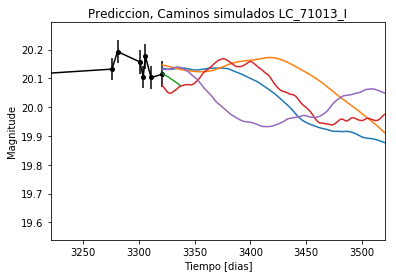

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_71013_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_71013_I')

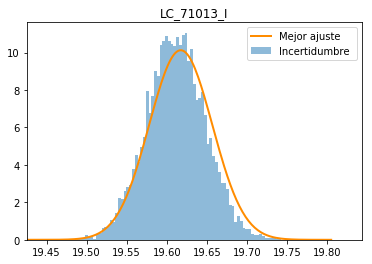

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71013_I')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_I')

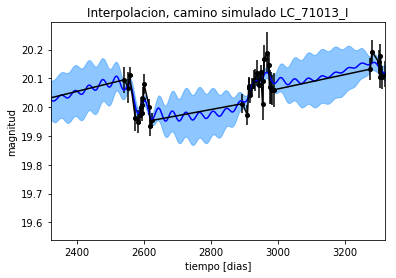

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_I')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_I')

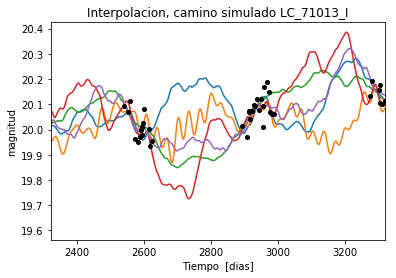

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 851.886603694
Median: 0.0144363269021
Standard deviation: 0.107976631758
68% credibility interval: [ 0.0010846   0.13717549]
95% credibility interval: [  3.66655158e-04   4.08143909e-01]
99% credibility interval: [  3.11818658e-04   4.94904874e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 360.496289319
Median: 0.00269434958147
Standard deviation: 0.0504288641105
68% credibility interval: [ 0.00048459  0.03295651]
95% credibility interval: [ 0.00032118  0.16326275]
99% credibility interval: [  3.06890042e-04   3.34799786e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 503.284113655
Median: 0.0190164417981
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1209.81862956
Median: 95.9067492302
Standard deviation: 1.67090223643
68% credibility interval: [ 94.03607126  97.17746669]
95% credibility interval: [ 91.55891577  97.92828675]
99% credibility interval: [ 89.69576602  98.29188089]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1015.48334669
Median: 0.574141860587
Standard deviation: 1.19262874221
68% credibility interval: [ 0.07103207  2.33337889]
95% credibility interval: [ 0.01810721  4.12780099]
99% credibility interval: [ 0.01154116  5.44856665]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 547.640809156
Median: 0.270070149006
Standard deviation: 2.59016909122
68% credibility interval: [ 0.01414465  3.33356633]
95% credibility interval: [  1.02363098e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10197.8114658
Median: 1.45884281171e-35
Standard deviation: 9.43670028285e+148
68% credibility interval: [  4.17241563e-77   7.54817645e-04]
95% credibility interval: [  1.30609220e-108   7.31912283e+022]
99% credibility interval: [  4.37469645e-118   8.62732944e+135]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2576.11668751
Median: 19.8902216766
Standard deviation: 0.0994600517536
68% credibility interval: [ 19.80311271  19.97289365]
95% credibility interval: [ 19.68054073  20.07411197]
99% credibility interval: [ 19.54589297  20.17983872]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 466.297471767
Median: 0.00594360553654
Standard deviation: 0.136687301642
68% credibility interval: [ 0.          0.22318455]
95% credibility interval: [ 0.          0.46953459]
99% credibility interval: [ 0.          0.51404649]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 466.297471767
Median: 0.00594360553654
Standard deviation: 0.136687301642
68% credibility interval: [ 0.          0.22318455]
95% credibility interval: [ 0.          0.46953459]
99% credibility interval: [ 0.          0.51404649]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 525.690296551
Median: 0.0
Standard deviation: 0.000543025119791
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1209.81862956
Median: 95.9067492302
Standard deviation: 1.67090223643
68% credibility interval: [ 94.03607126  97.17746669]
95% credibility interval: [ 91.55891577  97.92828675]
99% credibility interval: [ 89.69576602  98.29188089]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2270.90375018
Median: 0.0378261060355
Standard deviation: 0.0489437885828
68% credibility interval: [ 0.02311081  0.0711815 ]
95% credibility interval: [ 0.01533337  0.15645901]
99% credibility interval: [ 0.01243013  0.30344804]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2124.6120208
Median: 0.995481492981
Standard deviation: 0.168246402483
68% credibility interval: [ 0.85059558  1.1751995 ]
95% credibility interval: [ 0.72714294  1.39149776]
99% credibility interval: [ 0.65694086  1.56408552]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1190.34892779
Median: 0.000112837990951
Standard deviation: 0.0151700761464
68% credibility interval: [  3.06697051e-06   3.14382982e-03]
95% credibility interval: [  9.44320638e-27   3.81905999e-02]
99% credibility interval: [  2.71919311e-140   1.07022016e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 851.886603694
Median: (-0.0907061170808-0.808072547344j)
Standard deviation: 1.09447193233
68% credibility interval: [-0.86189901+0.j         -0.00681473-0.01433267j]
95% credibility interval: [ -2.56444381e+00-2.63198147j  -2.30376230e-03-1.89389643j]
99% credibility interval: [ -3.10957903e+00-1.93876916j  -1.95921441e-03-0.02021728j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 360.496289319
Median: (-0.0169290977027+0j)
Standard deviation: 0.915416947497
68% credibility interval: [-0.20707186+0.18790532j -0.00304479+0.01737925j]
95% credibility interval: [-1.02581010+1.07668331j -0.00201806+0.02735708j]
99% credibility interval: [ -2.10360910e+00+1.38566909j  -1.92824700e-03+0.j        ]
Posterior summary for pa